In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

import pandas as pd


file_path = 'bike_data.csv'

df = pd.read_csv(file_path)

print(df)  

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  count  
0      14.395        81     0.0000     16  
1      13.6

In [84]:
# Nâng cấp kiểm tra giá trị null và trực quan hóa (dán vào Colab)
import pandas as pd
import matplotlib.pyplot as plt

# tạo bảng thống kê null
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values('missing_pct', ascending=False)

# hiển thị bảng (toàn bộ nếu ít cột, hoặc top 50)
from IPython.display import display
if missing_df.empty:
    print("Không có giá trị null trong DataFrame.")
else:
    display(missing_df)            # toàn bộ các cột có giá trị null
    display(missing_df.head(50))   # top 50 để xem nhanh

# Bar chart phần trăm giá trị null (top 50)
if not missing_df.empty:
    top = missing_df['missing_pct'].head(50)
    fig, ax = plt.subplots(figsize=(10, max(4, 0.18 * len(top))))
    top.plot(kind='barh', ax=ax)
    ax.invert_yaxis()
    ax.set_xlabel('Missing (%)')
    ax.set_title('Tỷ lệ giá trị thiếu theo cột (top 50)')
    plt.tight_layout()
    plt.show()

# Nếu muốn, vẽ heatmap ma trận missing bằng missingno (nếu đã cài)
try:
    import missingno as msno
    if not missing_df.empty:
        msno.matrix(df, figsize=(14,4))
        plt.show()
        msno.heatmap(df, figsize=(8,6))
        plt.show()
except Exception as e:
    # nếu không có missingno thì bỏ qua
    pass

# danh sách cột không có missing
no_missing = [c for c in df.columns if df[c].notnull().all()]
print(f"Số cột không có missing: {len(no_missing)}")
# nếu muốn xem tên
if len(no_missing) <= 30:
    print("Cột không thiếu:", no_missing)


Không có giá trị null trong DataFrame.
Số cột không có missing: 10
Cột không thiếu: ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count']


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_count,missing_pct
datetime,10886,10886,2012-12-19 23:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
season,10886.0,4,NaN,NaN,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0,0,0.0
holiday,10886.0,2,NaN,NaN,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0,0,0.0
workingday,10886.0,2,NaN,NaN,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0,0,0.0
weather,10886.0,4,NaN,NaN,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0,0,0.0
temp,10886.0,49,NaN,NaN,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0,0,0.0
atemp,10886.0,60,NaN,NaN,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455,0,0.0
humidity,10886.0,89,NaN,NaN,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0,0,0.0
windspeed,10886.0,28,NaN,NaN,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969,0,0.0
count,10886.0,822,NaN,NaN,191.574132,181.144454,1.0,42.0,145.0,284.0,977.0,0,0.0


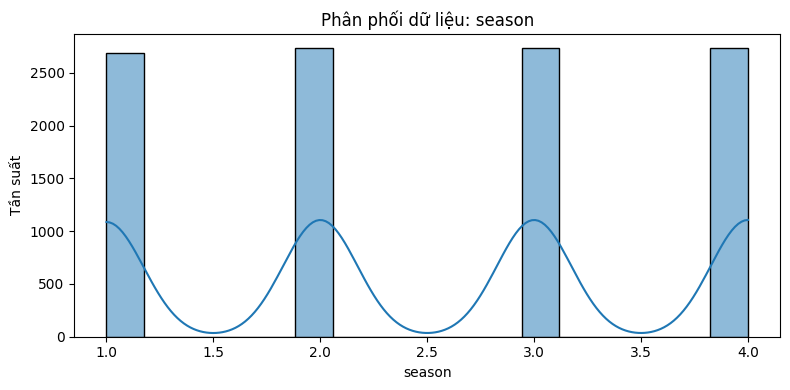

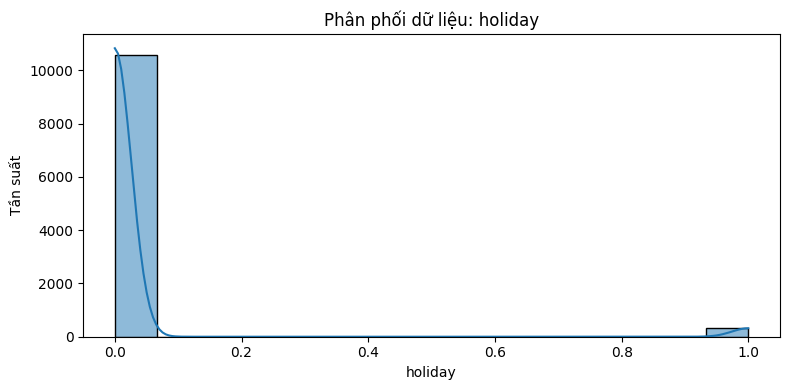

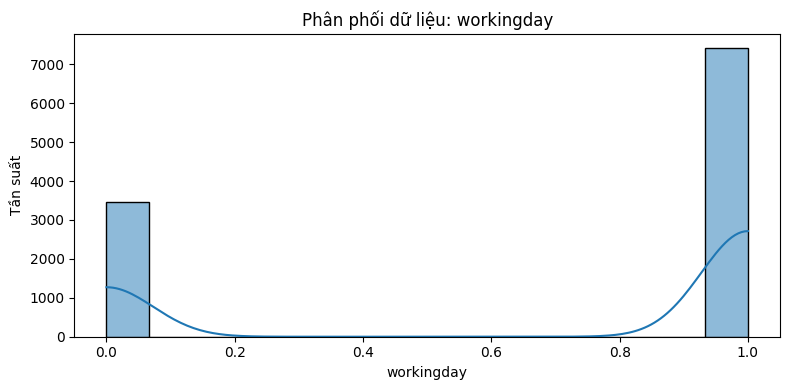

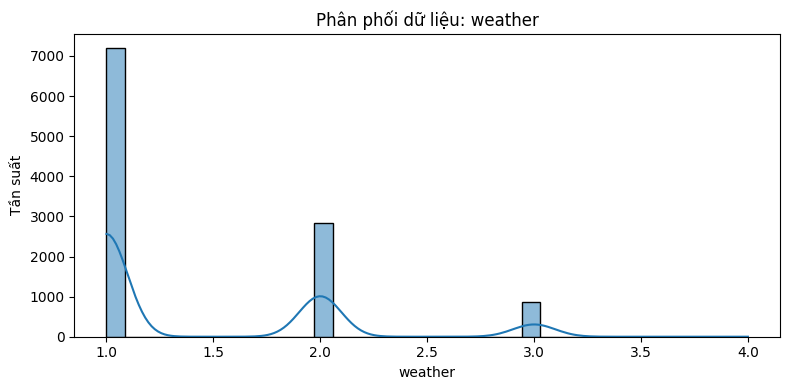

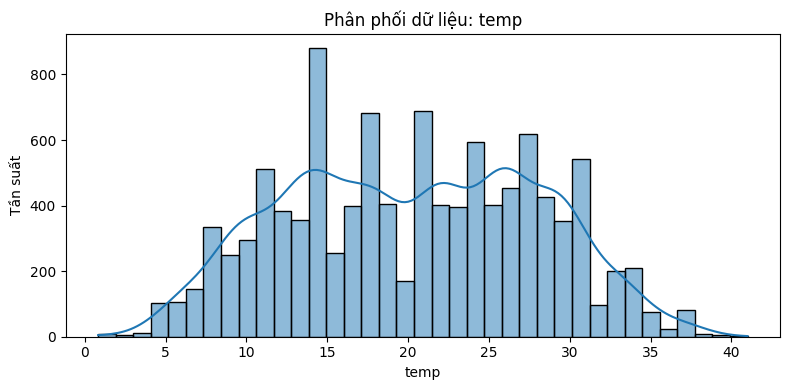

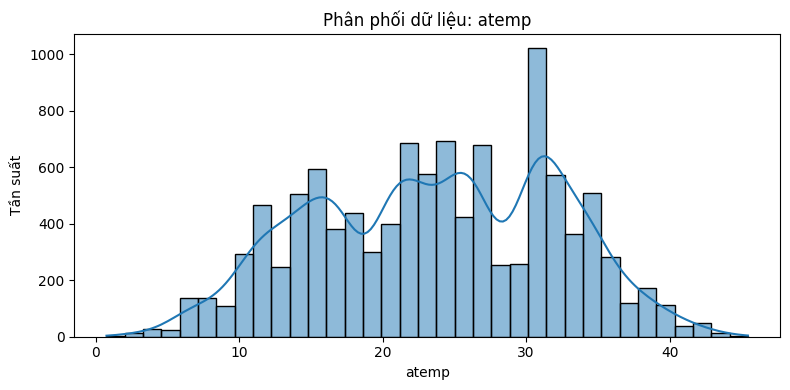

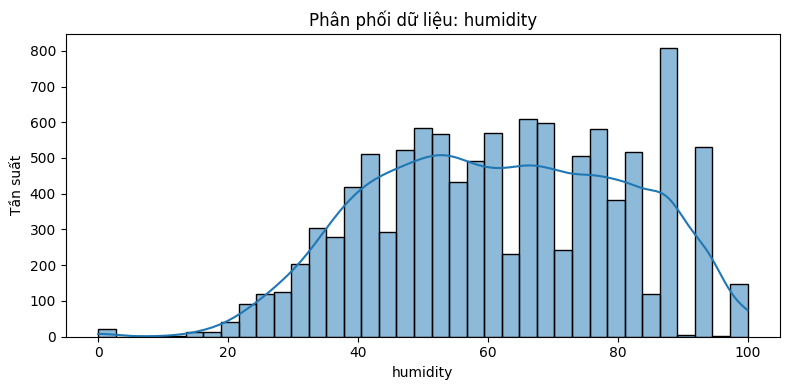

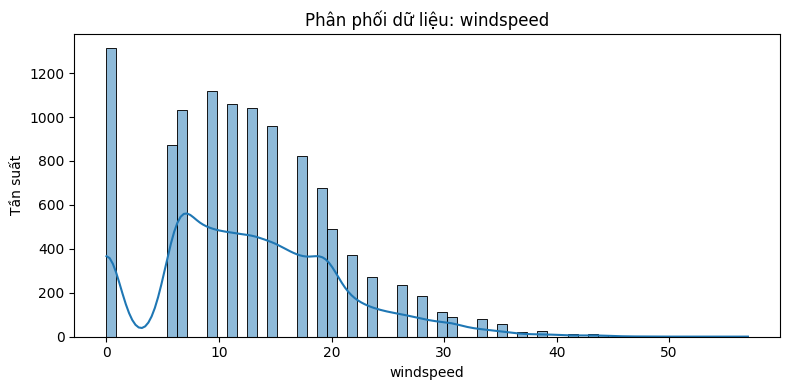

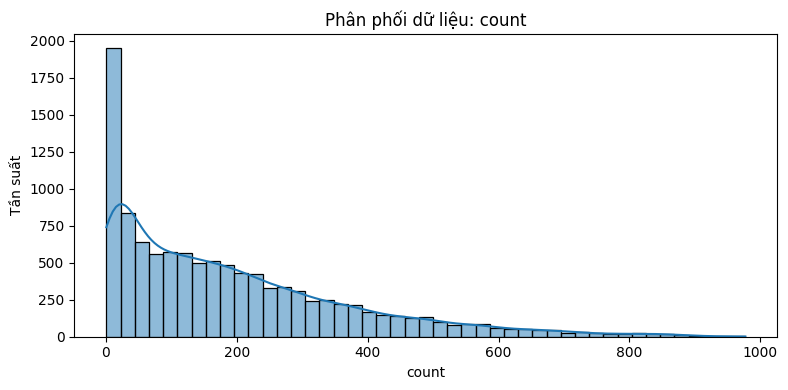

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thống kê mô tả mở rộng
desc = df.describe(include='all').transpose()

# Thêm số lượng missing và tỷ lệ missing
desc['missing_count'] = df.isnull().sum()
desc['missing_pct'] = (df.isnull().sum() / len(df)) * 100

# Thêm số lượng giá trị duy nhất
desc['unique'] = df.nunique()

# print(desc)

# dạng bảng 
from IPython.display import display
display(desc)

# -----------------------------
# Biểu đồ phân phối cho các cột số
# -----------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

if len(num_cols) > 0:
    for col in num_cols:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Phân phối dữ liệu: {col}')
        plt.xlabel(col)
        plt.ylabel('Tần suất')
        plt.tight_layout()
        plt.show()
else:
    print("Không có cột số để vẽ phân phối.")


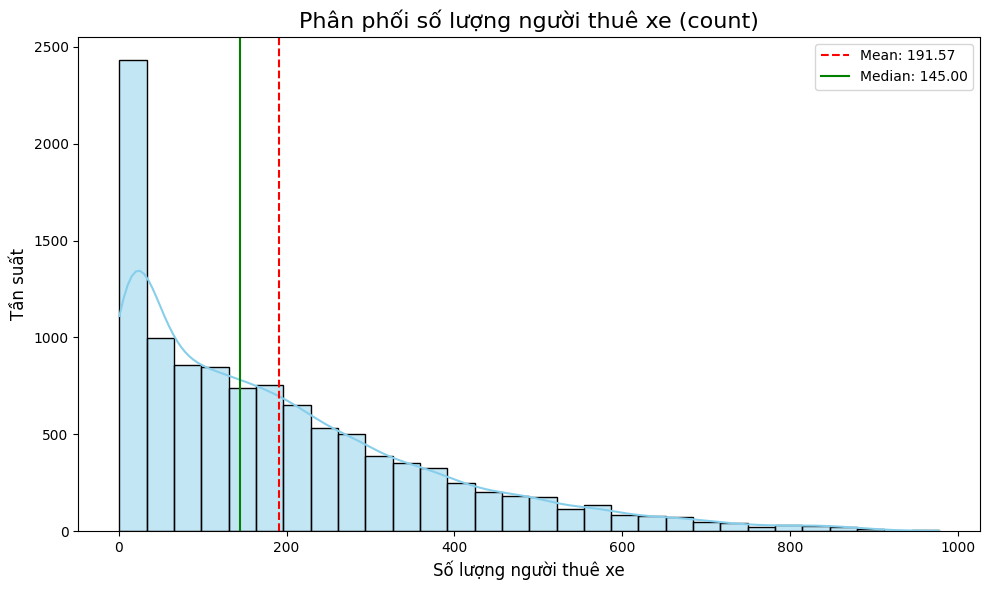

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))

# Vẽ histogram + KDE
sns.histplot(df['count'], bins=30, kde=True, color="skyblue")

# Tính mean và median
mean_val = df['count'].mean()
median_val = df['count'].median()

# Vẽ đường mean và median
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')

plt.title("Phân phối số lượng người thuê xe (count)", fontsize=16)
plt.xlabel("Số lượng người thuê xe", fontsize=12)
plt.ylabel("Tần suất", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


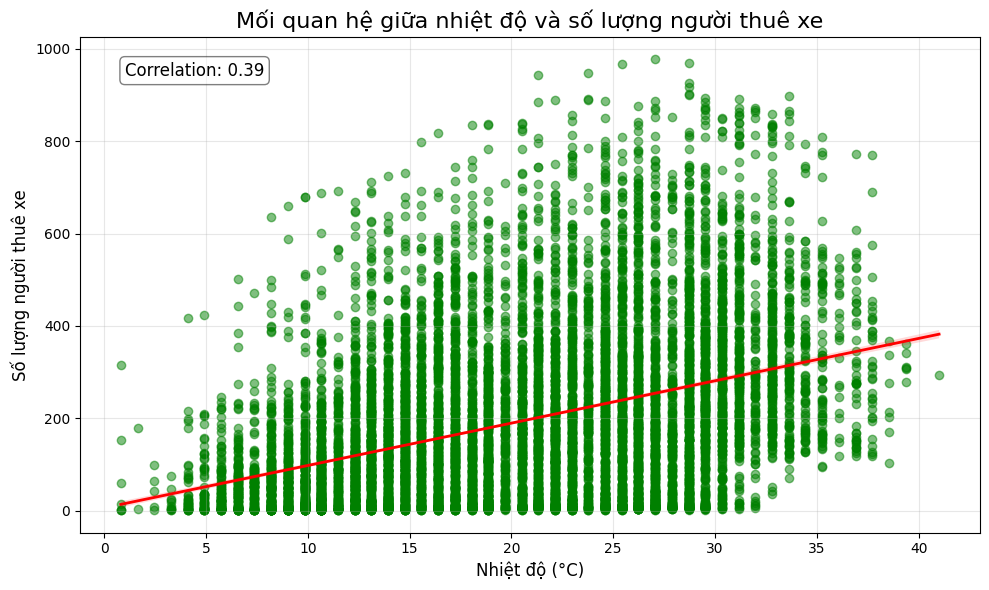

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))

# Vẽ scatter + regression line
sns.regplot(
    x=df['temp'],
    y=df['count'],
    scatter_kws={'alpha':0.5, 'color':'green'},
    line_kws={'color':'red', 'lw':2}
)

# Tính hệ số tương quan Pearson
corr = df['temp'].corr(df['count'])
plt.text(
    0.05, 0.95, f'Correlation: {corr:.2f}',
    transform=plt.gca().transAxes, fontsize=12,
    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)

plt.title("Mối quan hệ giữa nhiệt độ và số lượng người thuê xe", fontsize=16)
plt.xlabel("Nhiệt độ (°C)", fontsize=12)
plt.ylabel("Số lượng người thuê xe", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Tổng số lượng người thuê xe theo mùa:
season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_8008\1148371992.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_by_season.index, y=total_by_season.values, palette="coolwarm")


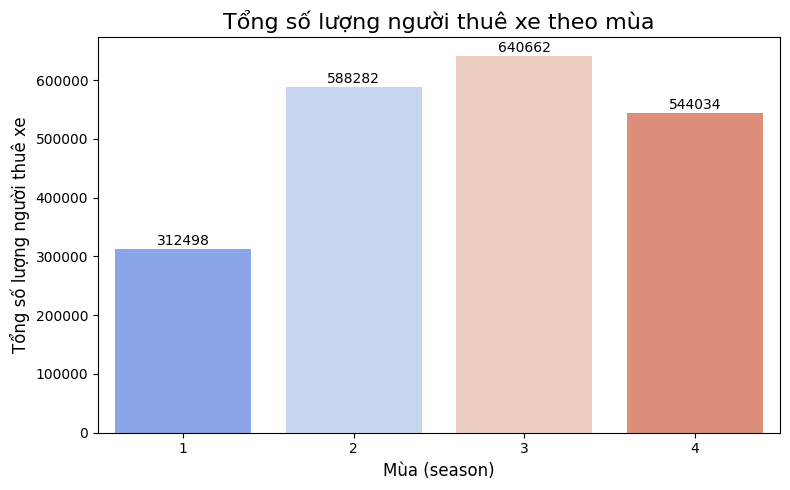

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Tính tổng số lượng theo mùa
# -----------------------------
total_by_season = df.groupby('season')['count'].sum()
print("Tổng số lượng người thuê xe theo mùa:")
print(total_by_season)

# -----------------------------
# 2. Trực quan hóa
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=total_by_season.index, y=total_by_season.values, palette="coolwarm")
plt.title("Tổng số lượng người thuê xe theo mùa", fontsize=16)
plt.xlabel("Mùa (season)", fontsize=12)
plt.ylabel("Tổng số lượng người thuê xe", fontsize=12)

# Thêm nhãn giá trị trên thanh
for i, v in enumerate(total_by_season.values):
    plt.text(i, v + max(total_by_season.values)*0.01, str(int(v)), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8008\2314022250.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='hour', y='count', data=df, inner=None, palette='coolwarm', alpha=0.7)


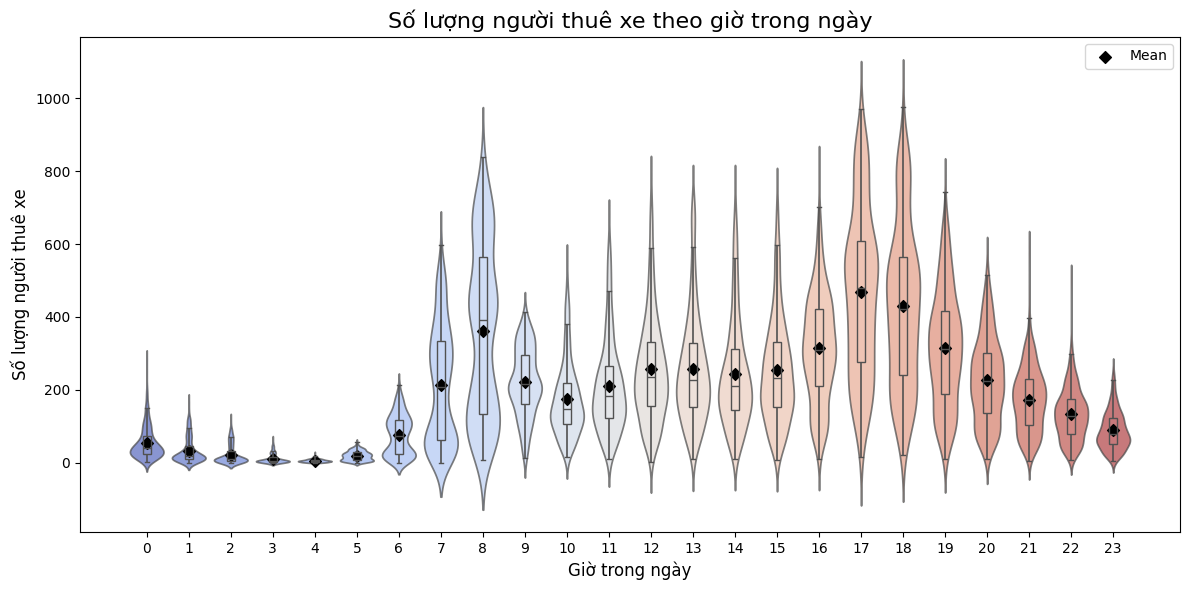

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Đảm bảo có cột hour (0–23)
if 'hour' not in df.columns:
    if not pd.api.types.is_datetime64_any_dtype(df['datetime']):
        df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour

plt.figure(figsize=(12,6))

# Violin plot kết hợp boxplot
sns.violinplot(x='hour', y='count', data=df, inner=None, palette='coolwarm', alpha=0.7)
sns.boxplot(x='hour', y='count', data=df, whis=1.5, width=0.2, showcaps=True, boxprops={'facecolor':'none'}, showfliers=False, whiskerprops={'linewidth':1.2})

# Tính và vẽ mean trên mỗi giờ
hour_mean = df.groupby('hour')['count'].mean().values
plt.scatter(range(len(hour_mean)), hour_mean, color='black', marker='D', label='Mean')

plt.title("Số lượng người thuê xe theo giờ trong ngày", fontsize=16)
plt.xlabel("Giờ trong ngày", fontsize=12)
plt.ylabel("Số lượng người thuê xe", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



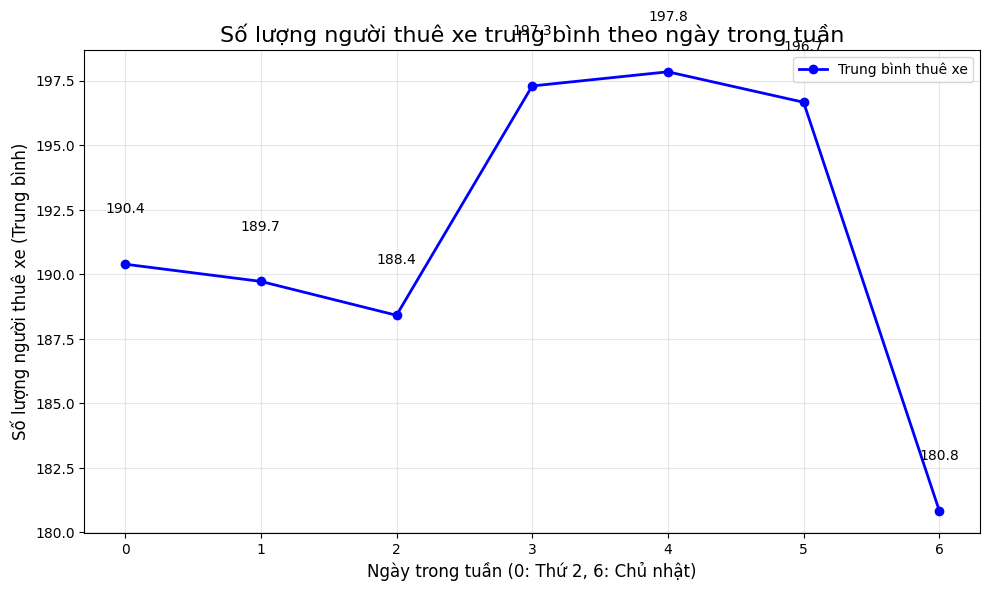

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Đảm bảo có cột day_of_week (0: Thứ 2, 6: Chủ nhật)
if 'day_of_week' not in df.columns:
    # Chuyển cột datetime sang dạng datetime nếu cần
    if not pd.api.types.is_datetime64_any_dtype(df['datetime']):
        df['datetime'] = pd.to_datetime(df['datetime'])
    df['day_of_week'] = df['datetime'].dt.dayofweek

# Tính trung bình thuê xe theo ngày trong tuần
mean_by_day = df.groupby('day_of_week')['count'].mean()

plt.figure(figsize=(10,6))

# Vẽ line plot với marker
plt.plot(mean_by_day.index, mean_by_day.values, marker='o', linestyle='-', 
         color='b', label='Trung bình thuê xe', lw=2)

# Thêm nhãn giá trị trên các điểm
for x, y in zip(mean_by_day.index, mean_by_day.values):
    plt.text(x, y + max(mean_by_day.values)*0.01, f"{y:.1f}", 
             ha='center', fontsize=10)

plt.title("Số lượng người thuê xe trung bình theo ngày trong tuần", fontsize=16)
plt.xlabel("Ngày trong tuần (0: Thứ 2, 6: Chủ nhật)", fontsize=12)
plt.ylabel("Số lượng người thuê xe (Trung bình)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

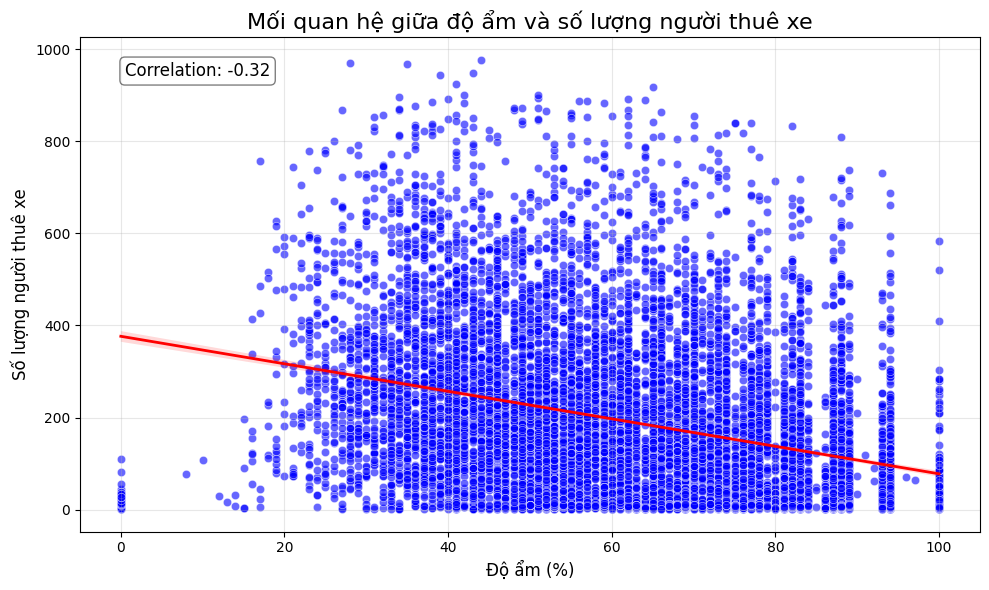

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Scatter plot
sns.scatterplot(
    x=df['humidity'],
    y=df['count'],
    alpha=0.6,
    color='blue'
)

# Regression line
sns.regplot(
    x=df['humidity'],
    y=df['count'],
    scatter=False,
    color='red',
    line_kws={'linewidth':2, 'linestyle':'-'}
)

# Pearson correlation
corr = df['humidity'].corr(df['count'])
plt.text(
    0.05, 0.95, f'Correlation: {corr:.2f}',
    transform=plt.gca().transAxes, fontsize=12,
    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)

plt.title("Mối quan hệ giữa độ ẩm và số lượng người thuê xe", fontsize=16)
plt.xlabel("Độ ẩm (%)", fontsize=12)
plt.ylabel("Số lượng người thuê xe", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8008\840786764.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='holiday', y='count', data=df, inner=None, palette='Set2', alpha=0.7)


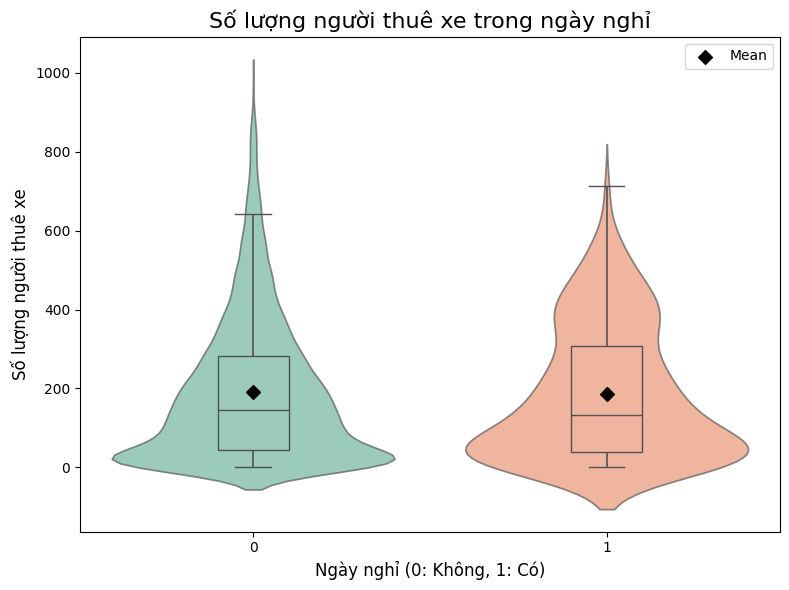

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Violin plot kết hợp boxplot
sns.violinplot(x='holiday', y='count', data=df, inner=None, palette='Set2', alpha=0.7)
sns.boxplot(x='holiday', y='count', data=df, width=0.2, showcaps=True, boxprops={'facecolor':'none'}, showfliers=False, whiskerprops={'linewidth':1.2})

# Thêm mean trên mỗi nhóm
means = df.groupby('holiday')['count'].mean().values
for i, m in enumerate(means):
    plt.scatter(i, m, color='black', marker='D', s=50, label='Mean' if i==0 else "")

plt.title("Số lượng người thuê xe trong ngày nghỉ", fontsize=16)
plt.xlabel("Ngày nghỉ (0: Không, 1: Có)", fontsize=12)
plt.ylabel("Số lượng người thuê xe", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


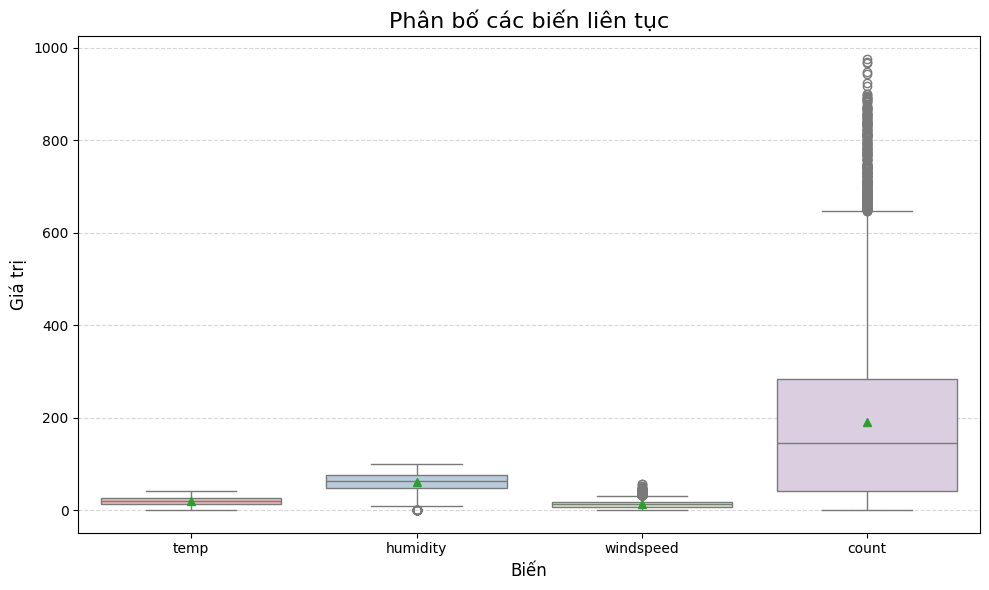

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))

# Boxplot cho các biến liên tục
sns.boxplot(data=df[['temp', 'humidity', 'windspeed', 'count']], palette='Pastel1', showmeans=True)

plt.title("Phân bố các biến liên tục", fontsize=16)
plt.ylabel("Giá trị", fontsize=12)
plt.xlabel("Biến", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [94]:
# Khai phá luật kết hợp với thuật toán Apriori
# Tìm các luật giữa đặc trưng (mùa, thời tiết, giờ, ngày làm việc/nghỉ, mức độ nhu cầu)

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules


# -----------------------------
# 1. Chuẩn bị dữ liệu dạng giao dịch nhị phân
# -----------------------------

# Bản sao dữ liệu để xử lý cho Apriori
ap_df = df.copy()

# Đảm bảo cột thời gian ở dạng datetime và có cột hour, day_of_week
if not pd.api.types.is_datetime64_any_dtype(ap_df['datetime']):
    ap_df['datetime'] = pd.to_datetime(ap_df['datetime'])

if 'hour' not in ap_df.columns:
    ap_df['hour'] = ap_df['datetime'].dt.hour

if 'day_of_week' not in ap_df.columns:
    ap_df['day_of_week'] = ap_df['datetime'].dt.dayofweek

# Rời rạc hóa (binning) mức độ nhu cầu thuê xe
ap_df['count_level'] = pd.cut(
    ap_df['count'],
    bins=[-1, 100, 300, ap_df['count'].max()],
    labels=['low_demand', 'medium_demand', 'high_demand']
)

# Chọn các cột để đưa vào khai phá luật kết hợp
cols_for_rules = ['season', 'weather', 'holiday', 'workingday', 'hour', 'day_of_week', 'count_level']

# Chuyển sang dạng one-hot (0/1) cho Apriori
basket = pd.get_dummies(ap_df[cols_for_rules].astype(str), prefix=cols_for_rules)

print("Kích thước ma trận giao dịch cho Apriori:", basket.shape)

# -----------------------------
# 2. Tìm tập mục thường xuyên bằng Apriori
# -----------------------------

frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)

print("\nMột vài tập mục thường xuyên (top 10):")
print(frequent_itemsets.head(10))

# -----------------------------
# 3. Sinh luật kết hợp và tính các độ đo: support, confidence, lift, correlation
# -----------------------------

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Tính hệ số tương quan (phi coefficient) giữa vế trái và vế phải của luật
p_ab = rules['support']
p_a = rules['antecedent support']
p_b = rules['consequent support']

rules['correlation'] = (p_ab - p_a * p_b) / np.sqrt(p_a * p_b * (1 - p_a) * (1 - p_b))

# Định dạng lại để in dễ đọc
rules_display = rules.copy()
rules_display['antecedents'] = rules_display['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_display['consequents'] = rules_display['consequents'].apply(lambda x: ', '.join(list(x)))

rules_display = rules_display[[
    'antecedents', 'consequents',
    'support', 'confidence', 'lift', 'correlation'
]].sort_values(by='lift', ascending=False)

print("\nCác luật kết hợp mạnh (top 15) với các độ đo Support, Confidence, Lift, Correlation:")
print(rules_display.head(15))


Kích thước ma trận giao dịch cho Apriori: (10886, 46)

Một vài tập mục thường xuyên (top 10):
      support                              itemsets
7    0.971431                           (holiday_0)
73   0.680875             (holiday_0, workingday_1)
9    0.680875                        (workingday_1)
4    0.660665                           (weather_1)
51   0.641925                (holiday_0, weather_1)
163  0.444516  (holiday_0, workingday_1, weather_1)
53   0.444516             (workingday_1, weather_1)
18   0.397575              (count_level_low_demand)
82   0.385265   (holiday_0, count_level_low_demand)
19   0.374426           (count_level_medium_demand)

Các luật kết hợp mạnh (top 15) với các độ đo Support, Confidence, Lift, Correlation:
                                          antecedents  \
339   holiday_0, workingday_0, count_level_low_demand   
191                                     day_of_week_6   
186                holiday_0, workingday_0, weather_1   
101                 

In [95]:
# Hiển thị bảng luật kết hợp (Luật kết hợp, Support, Confidence, Lift)

import pandas as pd
from IPython.display import display

# Giả sử đã chạy cell Apriori trước đó và có biến rules_display_rounded

rules_table = rules_display.copy()

# Tạo cột "Luật kết hợp": antecedents -> consequents
# Dùng kí hiệu mũi tên "->" cho dễ hiểu
rules_table['Luật kết hợp'] = rules_table['antecedents'] + ' -> ' + rules_table['consequents']

# Chỉ giữ các cột cần thiết
rules_table = rules_table[[
    'Luật kết hợp', 'support', 'confidence', 'lift'
]].rename(columns={
    'support': 'Support',
    'confidence': 'Confidence',
    'lift': 'Lift'
})

# Làm tròn cho đẹp
rules_table[['Support','Confidence','Lift']] = rules_table[['Support','Confidence','Lift']].round(2)

print("Bảng các luật kết hợp (top 20):")
display(rules_table.head(20))


Bảng các luật kết hợp (top 20):


,Luật kết hợp,Support,Confidence,Lift
339,"holiday_0, workingday_0, count_level_low_deman...",0.06,0.52,3.56
191,"day_of_week_6 -> holiday_0, workingday_0, weat...",0.10,0.69,3.47
186,"holiday_0, workingday_0, weather_1 -> day_of_w...",0.10,0.50,3.47
101,"holiday_0, workingday_0 -> day_of_week_5",0.15,0.50,3.44
190,"day_of_week_6, weather_1 -> holiday_0, working...",0.10,1.00,3.44
355,"day_of_week_5, count_level_low_demand -> holid...",0.06,1.00,3.44
341,"day_of_week_6, count_level_low_demand -> holid...",0.06,1.00,3.44
108,"day_of_week_6 -> holiday_0, workingday_0",0.15,1.00,3.44
103,"day_of_week_5 -> holiday_0, workingday_0",0.15,1.00,3.44
211,"day_of_week_5, weather_1 -> holiday_0, working...",0.10,1.00,3.44


C:\Users\HP\AppData\Local\Temp\ipykernel_8008\1969322367.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


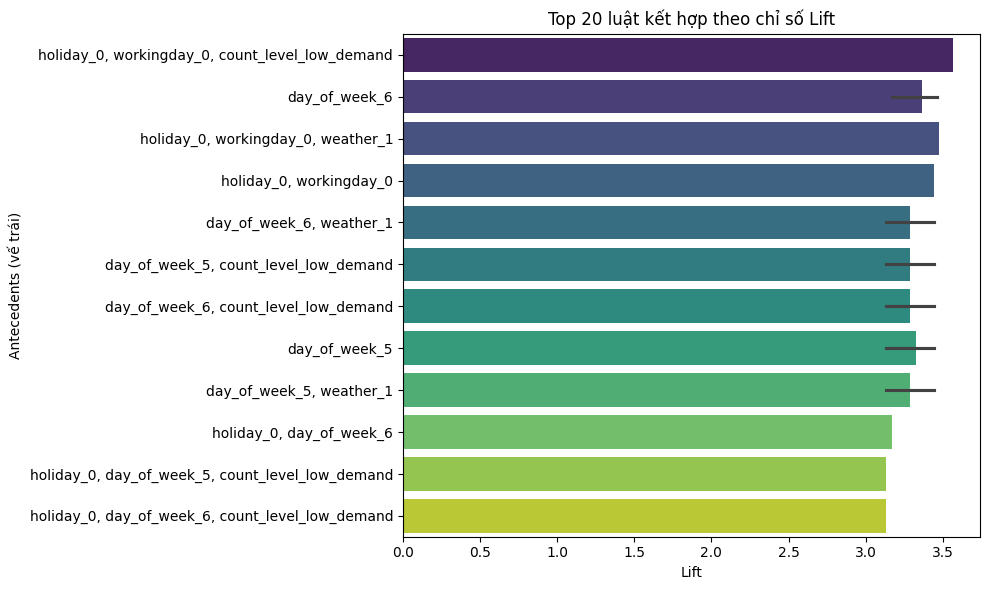

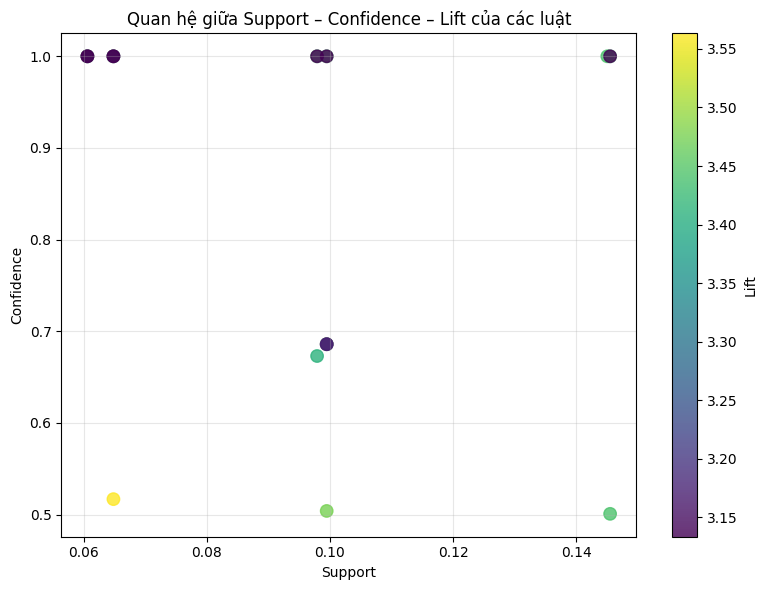

Đã vẽ xong các biểu đồ trực quan hóa luật kết hợp (Top 20 luật).


In [96]:
# Trực quan hóa các luật kết hợp: Support – Confidence – Lift

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Giả sử đã chạy cell Apriori và có biến rules_display_rounded

# Lấy top N luật mạnh theo Lift
N = 20
rules_vis = rules_display.head(N).copy()

# Biểu đồ thanh: Top N luật theo Lift
plt.figure(figsize=(10, 6))
sns.barplot(
    x='lift',
    y='antecedents',
    data=rules_vis,
    palette='viridis'
)
plt.title(f'Top {N} luật kết hợp theo chỉ số Lift')
plt.xlabel('Lift')
plt.ylabel('Antecedents (vế trái)')
plt.tight_layout()
plt.show()

# Biểu đồ scatter: Support vs Confidence, màu theo Lift
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    rules_vis['support'],
    rules_vis['confidence'],
    c=rules_vis['lift'],
    cmap='viridis',
    s=80,
    alpha=0.8
)
plt.colorbar(sc, label='Lift')
plt.title('Quan hệ giữa Support – Confidence – Lift của các luật')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print('Đã vẽ xong các biểu đồ trực quan hóa luật kết hợp (Top', N, 'luật).')


Hiệu suất của Random Forest Regressor:
RMSE: 69.93
MAE: 46.60
R²: 0.852
MAPE: 43.66%
Accuracy: 56.34%


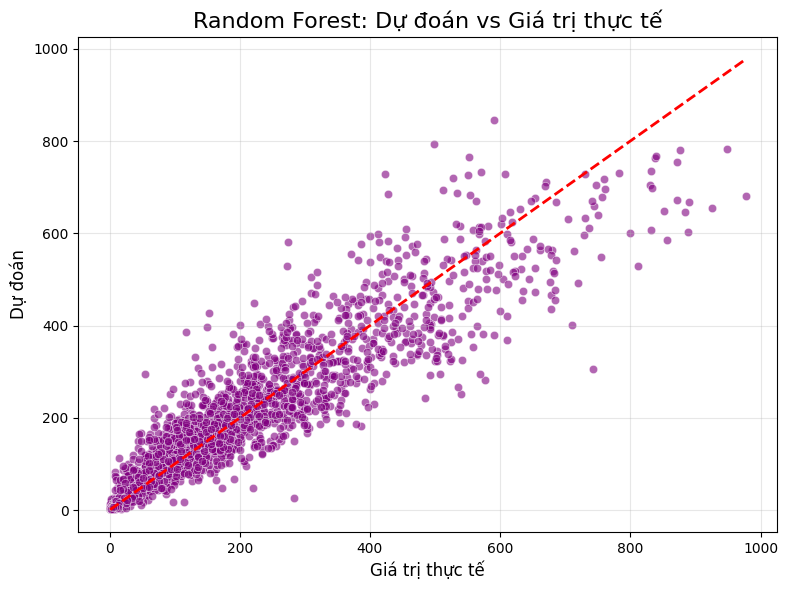

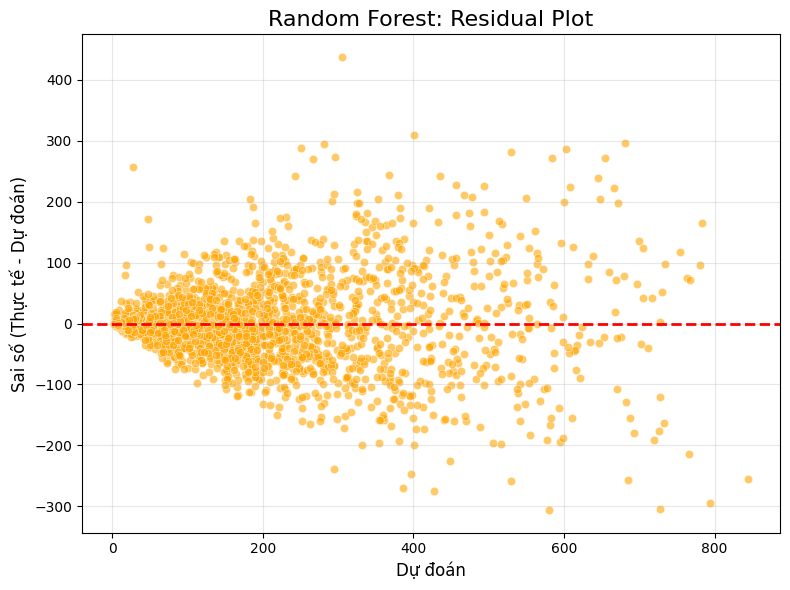

C:\Users\HP\AppData\Local\Temp\ipykernel_8008\1352284518.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


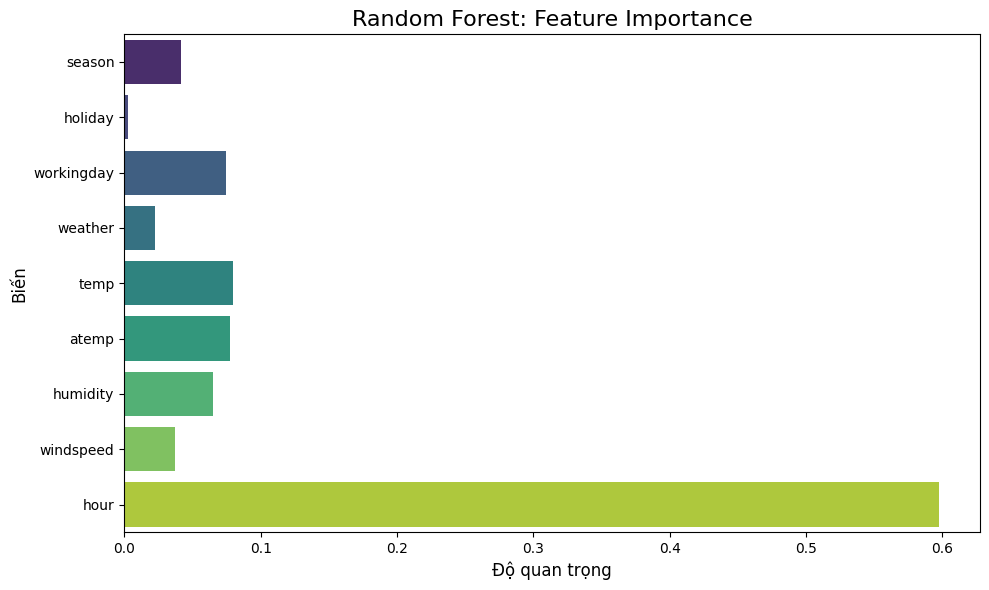

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -----------------------------
# Chuẩn bị dữ liệu
# -----------------------------
if 'hour' not in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour

X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']]
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Random Forest Regressor
# -----------------------------
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# -----------------------------
# Đánh giá hiệu suất
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
accuracy = 100 - mape

print("Hiệu suất của Random Forest Regressor:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

# -----------------------------
# Scatter plot: Dự đoán vs Thực tế
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # y=x line
plt.title("Random Forest: Dự đoán vs Giá trị thực tế", fontsize=16)
plt.xlabel("Giá trị thực tế", fontsize=12)
plt.ylabel("Dự đoán", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# Residual plot
# -----------------------------
residuals = y_test - y_pred_rf
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_rf, y=residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("Random Forest: Residual Plot", fontsize=16)
plt.xlabel("Dự đoán", fontsize=12)
plt.ylabel("Sai số (Thực tế - Dự đoán)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------
# Feature Importance
# -----------------------------
importances = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Random Forest: Feature Importance", fontsize=16)
plt.xlabel("Độ quan trọng", fontsize=12)
plt.ylabel("Biến", fontsize=12)
plt.tight_layout()
plt.show()


   season  holiday  workingday  weather  temp  atemp  humidity  windspeed  \
0       3        0           1        2  22.5   25.0        55       12.5   
1       2        1           0        1  30.0   32.0        40        8.0   
2       4        1           1        3  25.5   23.0        45        5.0   
3       1        0           1        4  18.5   15.0        30       10.5   

   hour  predicted_count  
0    14           199.04  
1    10           380.97  
2    18           591.65  
3    19           237.07  


C:\Users\HP\AppData\Local\Temp\ipykernel_8008\3397066882.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.index, y=result['predicted_count'], palette='coolwarm')


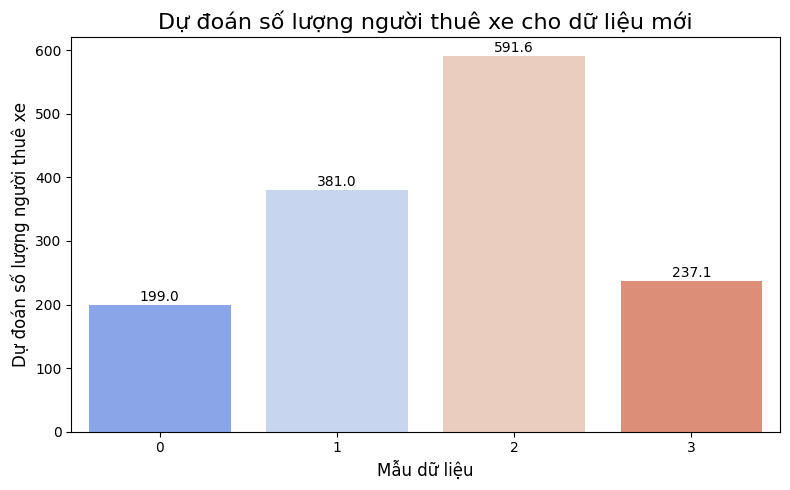

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dữ liệu mới
new_data = pd.DataFrame({
    'season': [3, 2, 4, 1],
    'holiday': [0, 1, 1, 0],
    'workingday': [1, 0, 1, 1],
    'weather': [2, 1, 3, 4],
    'temp': [22.5, 30.0, 25.5, 18.5],
    'atemp': [25.0, 32.0, 23, 15],
    'humidity': [55, 40, 45, 30],
    'windspeed': [12.5, 8.0, 5.0, 10.5],
    'hour': [14, 10, 18, 19]
})

# Dự đoán
new_predictions = rf_model.predict(new_data)

# Gộp dữ liệu đầu vào với dự đoán
result = new_data.copy()
result['predicted_count'] = new_predictions
print(result)

# -----------------------------
# Biểu đồ trực quan
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=result.index, y=result['predicted_count'], palette='coolwarm')
plt.title("Dự đoán số lượng người thuê xe cho dữ liệu mới", fontsize=16)
plt.xlabel("Mẫu dữ liệu", fontsize=12)
plt.ylabel("Dự đoán số lượng người thuê xe", fontsize=12)

# Thêm nhãn giá trị trên cột
for i, v in enumerate(result['predicted_count']):
    plt.text(i, v + max(result['predicted_count'])*0.01, f"{v:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
